In [26]:
__author__ = "Ryan Soklaski"
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

import cPickle
from collections import Counter

# Loading Data

In [37]:
with open('data/player_to_rank.p','rb') as f:
     player_to_rank_dict = cPickle.load(f)
with open('data/player_to_pt.p','rb') as f:
     player_to_pts_dict = cPickle.load(f)
with open('data/player_to_country.p') as f:
    player_to_cntry_dicts = cPickle.load(f)
with open('data/player_to_tag.pckl') as f:
    player_to_tag = cPickle.load(f)
with open('data/player_to_character.pckl') as f:
    player_to_character = cPickle.load(f)
with open('data/player_to_cumpts.pckl') as f:
    player_to_cumpts = cPickle.load(f)
with open('data/player_to_cumplacements.pckl') as f:
    player_to_cumplacements = cPickle.load(f)
with open('data/player_rank_link.p') as f:
    player_rank_link = cPickle.load(f)
with open('data/scrubed_tourney_data.p', 'rb') as f_:
    scrubed_tourney_data = cPickle.load(f_)
with open('data/all_char_names.p', 'rb') as f_:
    all_char_names = cPickle.load(f_)

with open('data/char_to_count.p', 'rb') as f_:
    char_to_count = cPickle.load(f_)
with open('data/char_to_tier.p', 'rb') as f_:
    char_to_tier = cPickle.load(f_)
with open('data/char_to_cnt_rank.p', 'rb') as f_:
    char_to_cnt_rank = cPickle.load(f_)
    
with open('data/player_DataFrame.pckl', 'rb') as f_:
    player_df = cPickle.load(f_) 

In [34]:
# player_names = [str(name) for name in player_df.index]
# player_df["Name"] = pd.Series(player_names, index=player_df.index, name='Name')
# player_df["Points Series"] =  pd.Series(player_to_cumpts)
# player_df["Placement Series"] = pd.Series(player_to_cumplacements)
# player_df["Character Series"] = pd.Series(player_to_character)

# with open('data/player_DataFrame.pckl', 'wb') as f_:
#     cPickle.dump(player_df, f_) 

## Data Work

In [64]:
char_to_tier = dict([(char_to_tier[pts], pts) for pts in char_to_tier])

In [65]:
char_to_tier

{'Abel': 27,
 'Adon': 17,
 'Akuma': 4,
 'Balrog': 29,
 'Blanka': 35,
 'C.Viper': 13,
 'Cammy': 3,
 'Chun-Li': 15,
 'Cody': 38,
 'Dan': 44,
 'Decapre': 14,
 'Dee Jay': 43,
 'Dhalsim': 41,
 'Dudley': 20,
 'E.Honda': 40,
 'El Fuerte': 33,
 'Elena': 12,
 'Evil Ryu': 2,
 'Fei Long': 8,
 'Gen': 34,
 'Gouken': 31,
 'Guile': 18,
 'Guy': 28,
 'Hakan': 39,
 'Hugo': 42,
 'Ibuki': 7,
 'Juri': 9,
 'Ken': 11,
 'M.Bison': 16,
 'Makoto': 36,
 'Oni': 26,
 'Poison': 5,
 'Rolento': 22,
 'Rose': 6,
 'Rufus': 19,
 'Ryu': 23,
 'Sagat': 30,
 'Sakura': 21,
 'Seth': 10,
 'T.Hawk': 37,
 'Vega': 24,
 'Yang': 25,
 'Yun': 1,
 'Zangief': 32}

In [67]:
char_to_tier['Makoto']

36

In [104]:
char_overunder = dict([(name, char_to_cnt_rank[name]-char_to_tier[name]) for name in char_to_cnt_rank])

In [79]:
char_to_char = dict([(name,name) for name in char_overunder])

In [105]:
s_discr = pd.Series(char_overunder, name='Discrepancy')

In [106]:
s_char = pd.Series(name_to_name, name='Name')

In [107]:
s_tier = pd.Series(char_to_tier)

In [108]:
s_rank = pd.Series(char_to_cnt_rank)

In [115]:
d = {"Name" : s_char, "Tier Discrepancy": s_discr, "Tier-Rank": s_tier, "Count-Rank": s_rank}

In [116]:
df_discr = pd.DataFrame(d)

In [117]:
df = df_discr.sort_values("Tier-Rank")

In [97]:
dfp = df[df['Tier Discrepancy']<=0]['Tier Discrepancy'] = 0

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [98]:
dfp

0

In [118]:
df[df['Tier Discrepancy']<=0]

,Count-Rank,Name,Tier Discrepancy,Tier-Rank
Evil Ryu,2,Evil Ryu,0,2
Ken,10,Ken,-1,11
Elena,7,Elena,-5,12
C.Viper,9,C.Viper,-4,13
Decapre,3,Decapre,-11,14
M.Bison,15,M.Bison,-1,16
Guile,6,Guile,-12,18
Rufus,8,Rufus,-11,19
Rolento,14,Rolento,-8,22
Ryu,21,Ryu,-2,23


In [180]:
clrs = [np.array([0.05333333, 0.3545098 , 0.05333333,  1.]) if x <= 0 else np.array([0.65333333, 0.05333333, 0.05333333, 1.]) for x in df["Tier Discrepancy"] ]

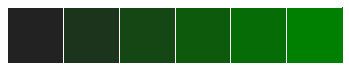

In [175]:
sns.palplot(sns.dark_palette("green"))

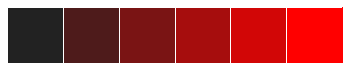

In [173]:
sns.palplot(sns.dark_palette("red"))

In [174]:
sns.dark_palette("red")

[array([ 0.13333333,  0.13333333,  0.13333333,  1.        ]),
 array([ 0.30666667,  0.10666667,  0.10666667,  1.        ]),
 array([ 0.48,  0.08,  0.08,  1.  ]),
 array([ 0.65333333,  0.05333333,  0.05333333,  1.        ]),
 array([ 0.82666667,  0.02666667,  0.02666667,  1.        ]),
 array([ 1.,  0.,  0.,  1.])]

In [179]:
sns.dark_palette("green")

[array([ 0.13333333,  0.13333333,  0.13333333,  1.        ]),
 array([ 0.10666667,  0.20705882,  0.10666667,  1.        ]),
 array([ 0.08      ,  0.28078431,  0.08      ,  1.        ]),
 array([ 0.05333333,  0.3545098 ,  0.05333333,  1.        ]),
 array([ 0.02666667,  0.42823529,  0.02666667,  1.        ]),
 array([ 0.        ,  0.50196078,  0.        ,  1.        ])]

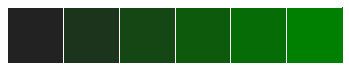

In [176]:
sns.palplot(sns.dark_palette("green"))

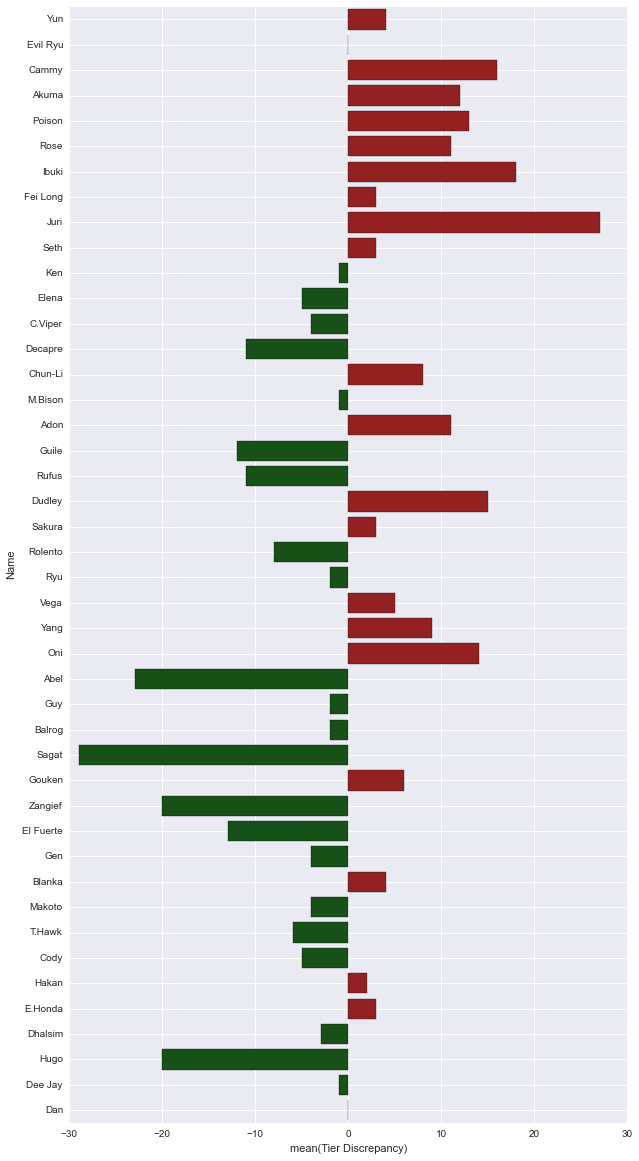

In [182]:
fig,ax = plt.subplots(figsize=(10,20))
# sns.barplot(x=x, y=y, cmap=clrs)
ax.legend('')

palette=sns.dark_palette("purple")
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
palette=sns.dark_palette("purple")
sns.barplot(y="Name", x="Tier Discrepancy", data=df, palette=clrs)
ax.grid('on')

In [87]:
df_discr.sort_values("Tier-Rank")

,Count-Rank,Name,Tier Discrepancy,Tier-Rank
Yun,5,Yun,-4,1
Evil Ryu,2,Evil Ryu,0,2
Cammy,19,Cammy,-16,3
Akuma,16,Akuma,-12,4
Poison,18,Poison,-13,5
Rose,17,Rose,-11,6
Ibuki,25,Ibuki,-18,7
Fei Long,11,Fei Long,-3,8
Juri,36,Juri,-27,9
Seth,13,Seth,-3,10


In [5]:
player_df[:10]

,Country,Points,Rank,Tag,Name,Points Series,Placement Series,Character Series
Momochi,Japan,1374,1,EG,Momochi,"[128, 4, 128, 16, 1024, 2, 8, 64]","[2, 9, 2, 5, 1, 13, 7, 3]","[Ken, Elena, Ken, Evil Ryu, Ken, Cody, Ken, Ke..."
Infiltration,Korea,1076,2,None,Infiltration,"[32, 128, 8, 128, 128, 64, 8, 4, 256, 128, 128...","[3, 1, 7, 1, 1, 3, 7, 9, 3, 1, 1, 3]","[Decapre, Akuma, Hakan, Decapre, Akuma, Declar..."
Bonchan,Japan,896,3,RB,Bonchan,"[4, 32, 64, 8, 8, 8, 128, 128, 256, 256, 4]","[9, 4, 2, 5, 7, 7, 1, 2, 1, 1, 9]","[Sagat, Sagat, Sagat, Yun, Sagat, Sagat, Sagat..."
Xian,Singapore,798,4,RZR,Xian,"[256, 16, 4, 8, 128, 256, 128, 2]","[1, 5, 9, 7, 1, 1, 2, 13]","[Gen, Elena, Gen, Elena, Gen, Elena, Gen, Pois..."
GamerBee,Taiwan,740,5,AVM,GamerBee,"[128, 16, 32, 4, 512, 16, 32]","[2, 5, 3, 9, 2, 5, 4]","[Adon, Elena, Adon, Elena, Elena, Adon, Yun, A..."
Luffy,France,724,6,MD,Luffy,"[64, 4, 128, 128, 128, 128, 128, 16]","[3, 9, 1, 1, 1, 1, 1, 5]","[Rose, Rose, Rose, Rose, Rose, Rose, Rose, Rose]"
Tokido,Japan,700,7,MCZ,Tokido,"[128, 8, 32, 32, 16, 128, 4, 64, 32, 256]","[2, 5, 3, 4, 4, 2, 9, 5, 3, 1]","[Akuma, Akuma, Akuma, Akuma, Akuma, Akuma, Hug..."
Fuudo,Japan,610,8,RZR,Fuudo,"[64, 8, 4, 2, 4, 4, 128, 8, 4, 256, 128]","[3, 7, 9, 13, 7, 9, 2, 5, 9, 1, 2]","[Fei Long, Fei Long, Sagat, Fei Long, Fei Long..."
Mago,Japan,556,9,MCZ,Mago,"[2, 256, 2, 256, 16, 16, 8]","[13, 1, 13, 1, 5, 5, 7]","[Yang, Yang, Yang, Fei Long, Yang, Fei Long, Y..."
Daigo Umehara,Japan,546,10,MCZ,Daigo Umehara,"[2, 256, 256, 16, 16]","[13, 1, 1, 5, 9]","[Evil Ryu, Evil Ryu, Evil Ryu, Ryu, Evil Ryu, ..."


## Some Plots

<Container object of 7 artists>

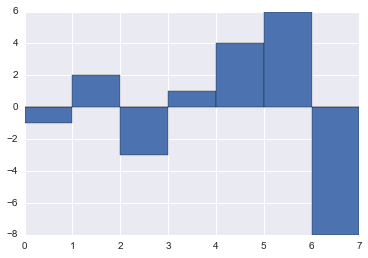

In [48]:
x = range(7)
negative_data = [-1,-0,-3,-0,-0,-0,-8]
positive_data = [ 0, 2, 0, 1, 4, 6, 0]

fig = plt.figure()
ax = plt.subplot(111)
ax.bar(x, negative_data, width=1)
ax.bar(x, positive_data, width=1)

In [200]:
x = player_df["Rank"].values
y_len = [len(i) for i in player_df["Placement Series"].values]
y_mean = [np.mean(i) for i in player_df["Placement Series"].values]
y_char = [len(set(i)) for i in player_df["Character Series"].values]

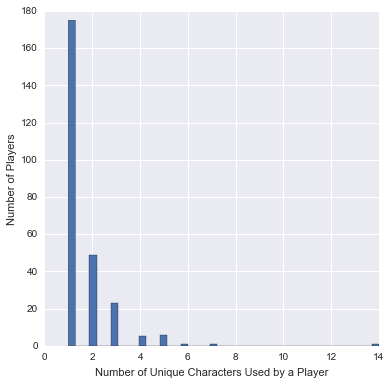

In [227]:
fig,ax = plt.subplots(figsize=(6,6))
ax.hist(y_char, bins=len(all_char_names));
ax.set_xlabel('Number of Unique Characters Used by a Player')
ax.set_ylabel('Number of Players')

(0.5, 14.5)

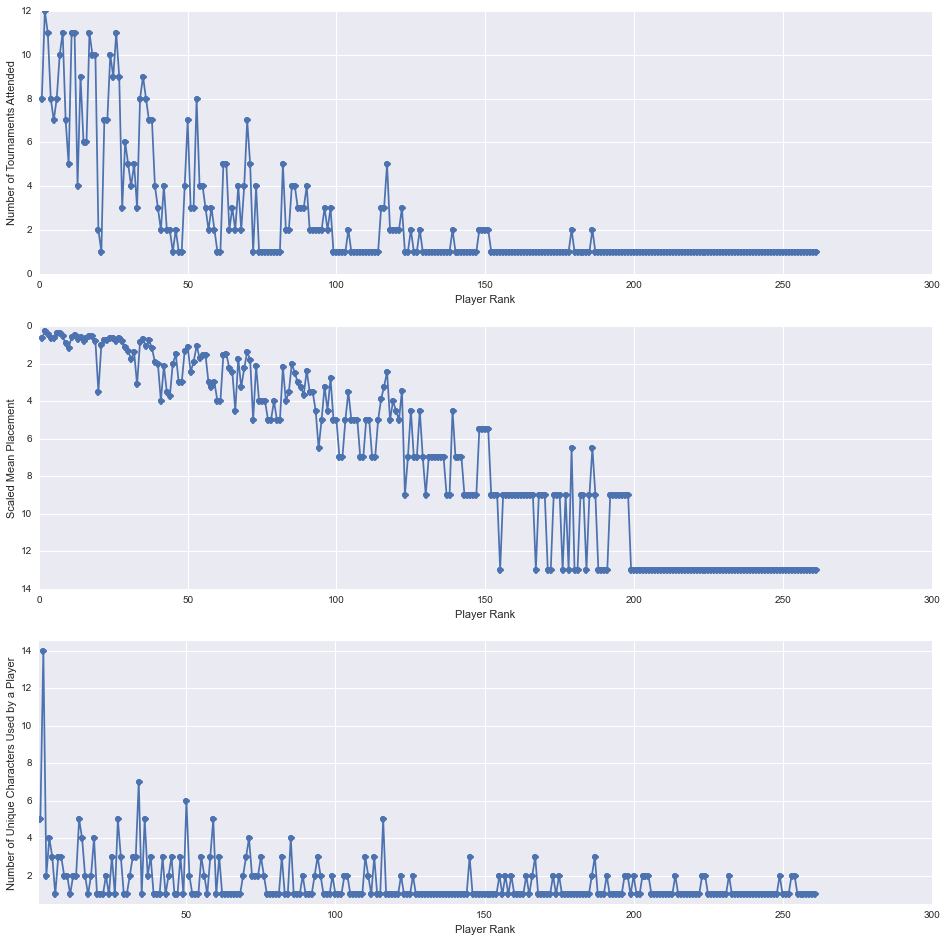

In [232]:
fig,(ax,ax1,ax2) = plt.subplots(figsize=(16,16), nrows=3)
ax.plot(x, y_len, marker='o')
ax.set_xlabel('Player Rank')
ax.set_ylabel('Number of Tournaments Attended')

ax1.plot(x, np.array(y_mean)/np.array(y_len), marker='o')
ax1.set_xlabel('Player Rank')
ax1.set_ylabel('Scaled Mean Placement')
ax1.set_ylim(14, 0)

ax2.plot(x, y_char, marker='o')
ax2.set_xlabel('Player Rank')
ax2.set_ylabel('Number of Unique Characters Used by a Player')
ax2.set_xlim(0.5, None)
ax2.set_ylim(0.5, 14.5)

In [ ]:
rank_num_comp = np.array([(df_tmp.loc[name]["Name"] df_tmp.loc[name]["Name"]) for name in list(df_tmp.index)])

In [238]:
df_tmp = player_df[player_df.Rank<=32]

In [250]:
name_sq = []
rank_sq = []
pt_sq = []
cntry_sq = []
for name in list(df_tmp.index):
    name_sq.extend(name for i in df_tmp.loc[name]["Placement Series"])
    rank_sq.extend(df_tmp.loc[name]["Placement Series"])
    pt_sq.extend(df_tmp.loc[name]["Points Series"])
    cntry_sq.extend(df_tmp.loc[name]["Country"] for i in df_tmp.loc[name]["Placement Series"])

In [251]:
d = {"Name": name_sq, "Ranks": rank_sq, "Country": cntry_sq, "Points": pt_sq}

In [252]:
df = pd.DataFrame(d)

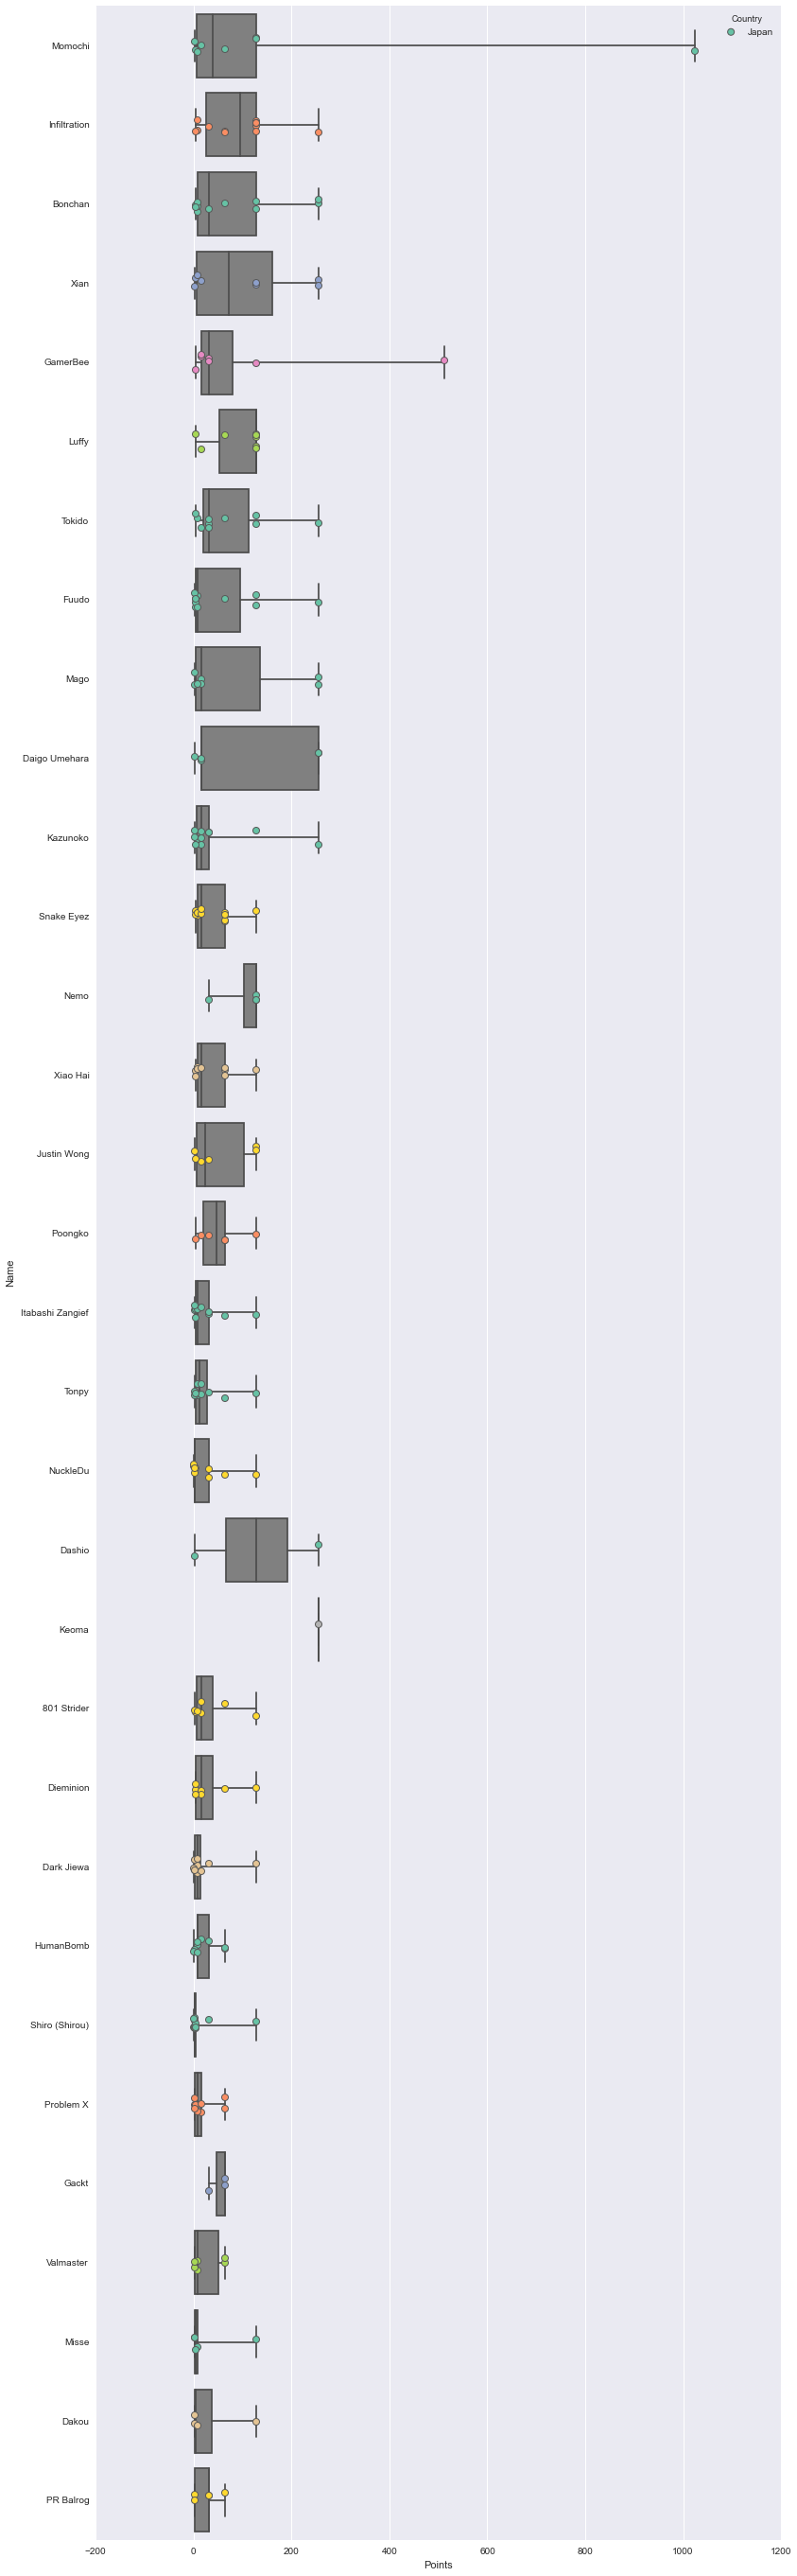

In [254]:
fig,ax = plt.subplots(figsize=(13,48))
sns.boxplot(y="Name", x="Points", data=df, whis=np.inf, color='grey')
sns.stripplot(y="Name", x="Points", data=df, jitter=True, hue="Country", edgecolor="gray", palette="Set2", split=False);
# ax.set_xlim(15,.4)

(15, 0.4)

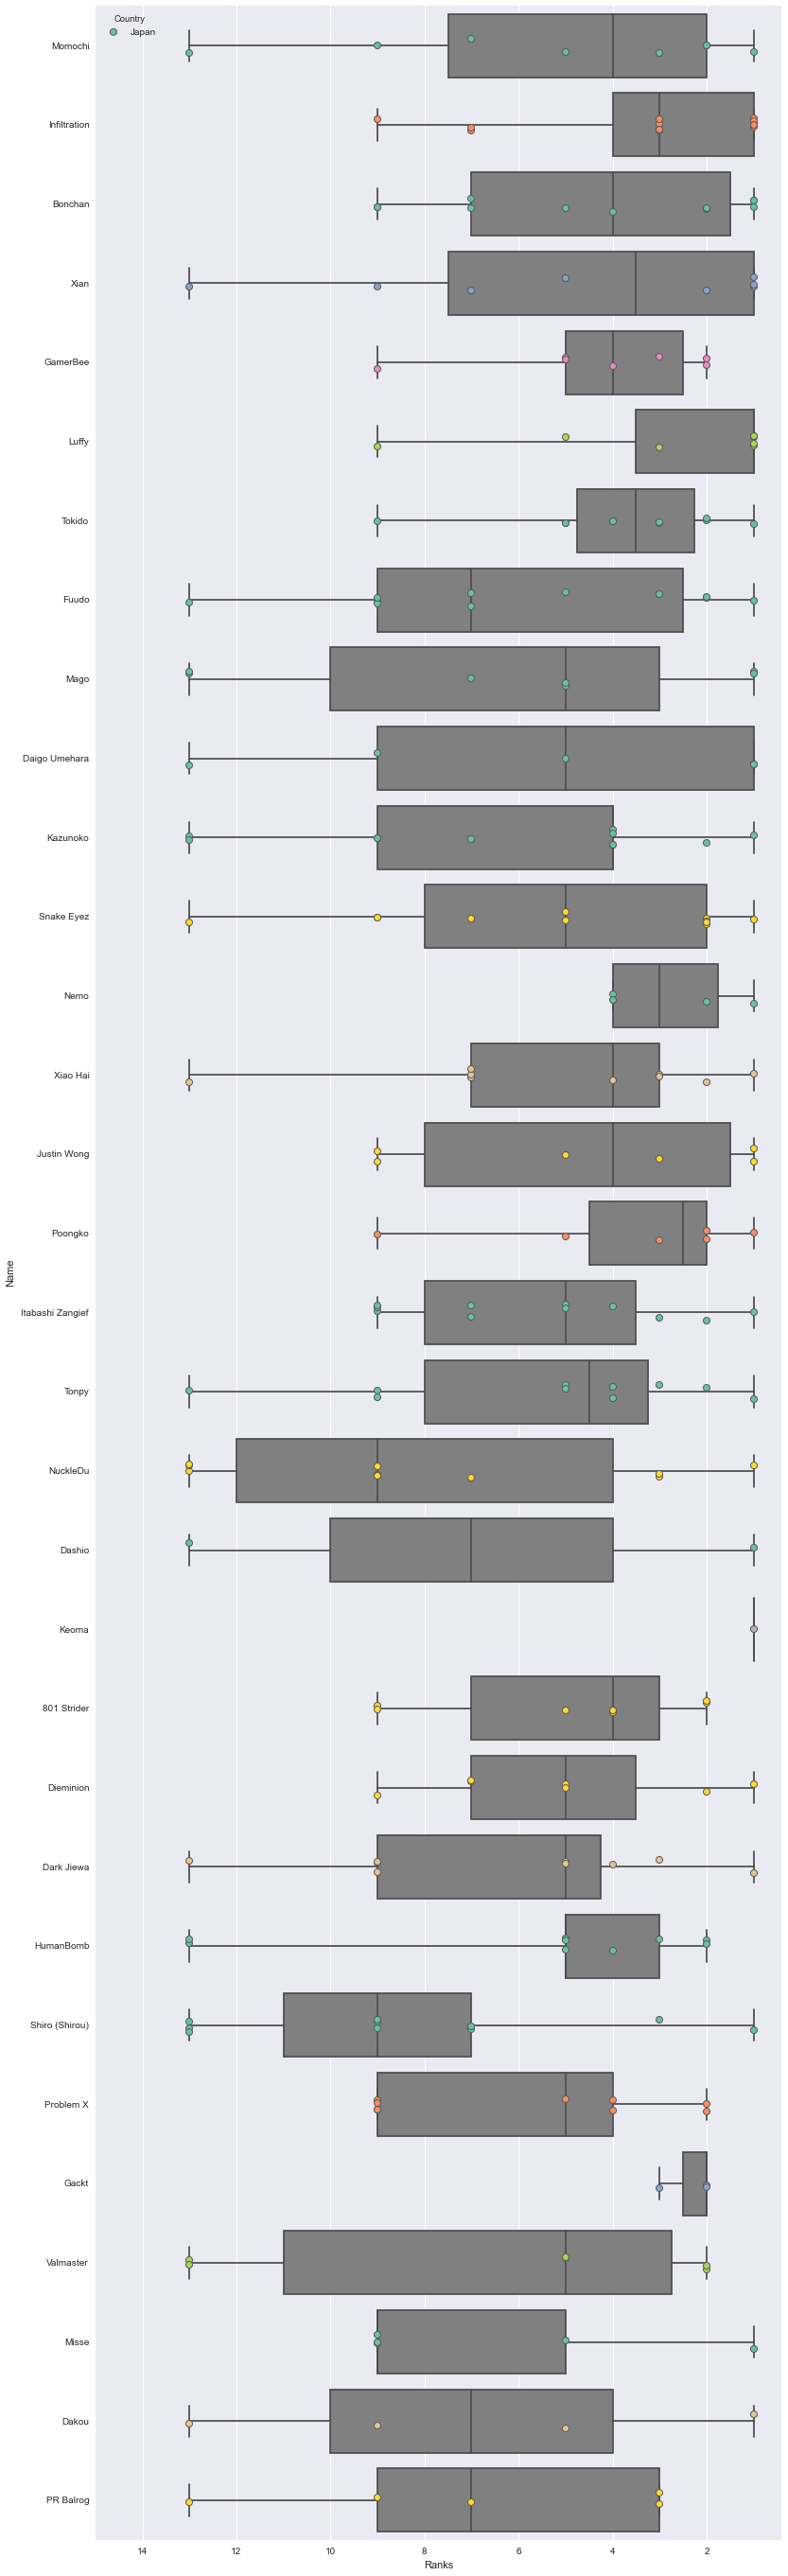

In [242]:
fig,ax = plt.subplots(figsize=(13,48))
sns.boxplot(y="Name", x="Ranks", data=df, whis=np.inf, color='grey')
sns.stripplot(y="Name", x="Ranks", data=df, jitter=True, hue="Country", edgecolor="gray", palette="Set2", split=False);
ax.set_xlim(15,.4)

(300, 0.5)

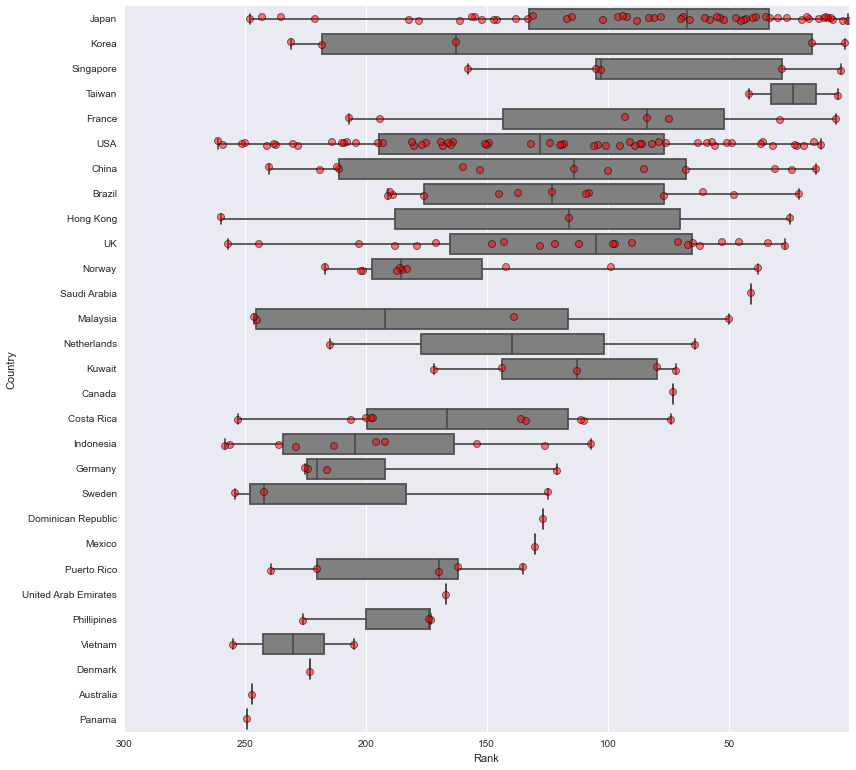

In [270]:
fig,ax = plt.subplots(figsize=(13,13))
sns.stripplot(y="Country", x="Rank", data=player_df[player_df['Country'] != ''], color='red',edgecolor='black', jitter=True);
sns.boxplot(y="Country", x="Rank", data=player_df[player_df['Country'] != ''], whis=np.inf, color='grey');
ax.set_xlim(300,.5)

(300, 0.5)

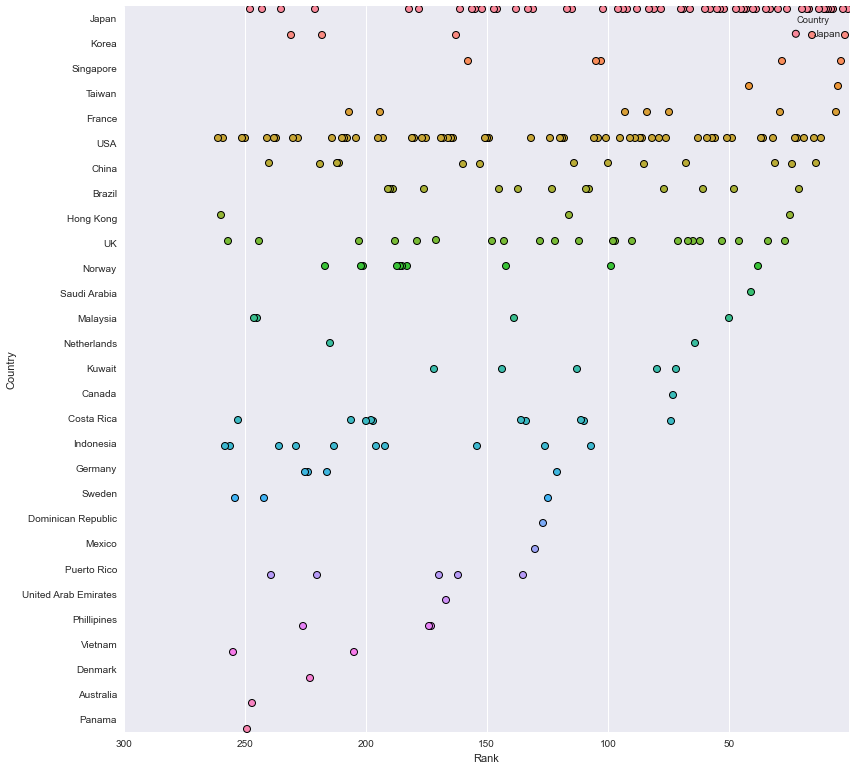

In [8]:
fig,ax = plt.subplots(figsize=(13,13))
sns.stripplot(y="Country", x="Rank", data=player_df[player_df['Country'] != ''],hue="Country",edgecolor='black', jitter=True);
# sns.boxplot(y="Country", x="Rank", data=player_df[player_df['Country'] != ''], whis=np.inf, color='grey');
ax.set_xlim(300,.5)